In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./데이터/glass.csv")

In [3]:
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [4]:
# 특징과 라벨 분리
X=df.drop(['Type'], axis=1)
Y=df['Type']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Fe      214 non-null    float64
 8   Type    214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.2 KB


In [5]:
# 학습데이터와 평가데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

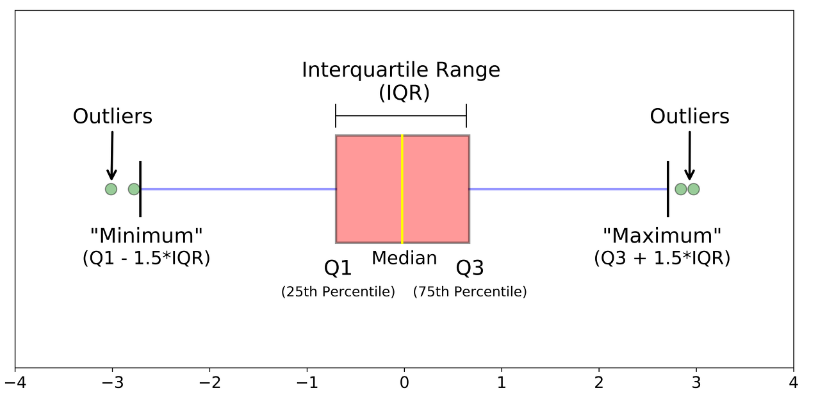

- RI 컬럼을 사용해서 이상치 계산

In [9]:
val_list = df['RI']

In [10]:
# 위 컬럼값에 대해 Q1, Q3 계산
# np의 quantile(list,percentile)
import numpy as np
Q1 = np.quantile(val_list,0.25)
Q3 = np.quantile(val_list,0.75)

# IQR 계산 : Q3 - Q1
IQR = Q3-Q1

print(Q1, Q3, IQR)

1.5165225 1.5191575 0.002634999999999943


In [16]:
# minimum - box plot의 아래 경계
# minimum보다 작으면 이상치
minimum = Q1-1.5*IQR
# 위 결과보다 작으면 이상치

In [17]:
# maximum - box plot의 위 경계
# maxmum보다 크면 이상치
maximum = Q3+1.5*IQR

In [ ]:
(maximum > val_list) & (minimum < val_list) # 정상데이터 조건

In [20]:
((maximum > val_list) & (minimum < val_list)).sum()

197

In [23]:
# IQR 룰에 따라 이상치 판별하는 함수-컬럼별로 이상치 판별해야 함
def IQR_rule(val_list) :
    # IQR 계산
    Q1 = np.quantile(val_list,0.25)
    Q3 = np.quantile(val_list,0.75)
    # IQR 계산 : Q3 - Q1
    IQR = Q3-Q1
    
    # 경계값 계산
    minimum = Q1-1.5*IQR
    maximum = Q3+1.5*IQR
    
    # 이상치 조건을 통해 판별
    not_outlier_cond = (maximum > val_list) & (minimum < val_list)
    
    return not_outlier_cond

In [26]:
# 함수 테스트
IQR_rule(Train_X['Na'])

158     True
8       True
103     True
12      True
77      True
       ...  
151     True
163     True
184    False
146     True
90      True
Name: Na, Length: 160, dtype: bool

In [27]:
# 사용자 정의함수를 df의 각 열별로 호출해야 함
# apply()함수 활용하면 효율적
# Train_X에 대해 이상치 확인
conditions = Train_X.apply(IQR_rule)
# IQR_rule함수를 컬럼별로 호출함

In [28]:
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
158,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True
103,False,True,True,True,False,True,False,True
12,True,True,True,True,True,True,True,False
77,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
151,True,True,True,True,True,True,True,True
163,True,True,True,False,False,False,False,True
184,False,False,False,False,False,True,False,True
146,True,True,True,True,True,True,True,True


In [32]:
tot_cond = conditions.sum(axis=1)==len(Train_X.columns)
# IQR 규칙에 위배되는 이상치 값이 하나라도 있는 레코드를 제거하기위한 T/F

In [34]:
Train_X =Train_X.loc[tot_cond]

In [35]:
Train_X.shape # 이상치 삭제됨

(104, 8)